In [ ]:
! pip install control

In [2]:
import math as m
import matplotlib.pyplot as plt
from control.matlab import *
import numpy as np
from scipy import signal

In [3]:
## INFO: 
# C:        The capacitors of the loop in Farads
# R:        The resistors of the loop in Ohms
# ipump:    The charge pump current in Amperes
# vco_gain: The VCO gain in Hertz/Volt
# fout:     The output frequency in Hertz
# fref:     The reference frequency in Hertz
# div_pn:   The divider phase noise profile (from SpectreRF)
# pfd_pn:   The PFD & CP current noise profile (from SpectreRF)
# vco_pn:    The VCO phase noise profile (from SpectreRF)

In [4]:
f = np.logspace (2 ,11 ,10000) 
w = 2*m.pi*f

#### PLL Parameters ###

C1       = 9.26e-12
C2       = 1.023e-12
R1       = 68e3
ipump    = 100e-6
vco_gain = 200e6
fref     = 10e6
fout     = 2.402e9

In [5]:
# Conversion of parameters
Kpd  = ipump/2/m.pi;     # phase detector gain
Kvco = vco_gain*2*m.pi;  # vco gain
N    = fout/fref;        #division ratio

# Filter Transfer Function
flt  =(R1*C1*(1j*w)+1)/(R1*C1*C2*(1j*w)**2+(C1+C2)*(1j*w))

# VCO Transfer Function
Gvco = Kvco/(1j*w)

In [6]:
# Loop Transfer Functions
G  = Kpd*Gvco*flt; # forward gain
FB = 1/N;          # feedback gain
OL = G*FB;         # open loop gain
H  = G/(1+OL);     # closed loop gain

In [7]:
# NOISE CONTIRBUTORS
Sref  = 0
Sndiv = 0
Sich  = 0
Svco  = 0

In [8]:
# OL_TF Functions
def OL_TF ():
    # plot open loop Transfer function
    plt.semilogx(f,20*np.log10(abs(OL)), marker = ".",
                 markersize = 1,
                 color = "red")
    # plot with grid
    plt.grid(True)
    plt.xlabel('Frequency (Hz)') 
    plt.ylabel('Gain (dB)') 
    # displaying the title
    plt.title('Open-Loop Transfer Function')
    # show the plot
    plt.show() 

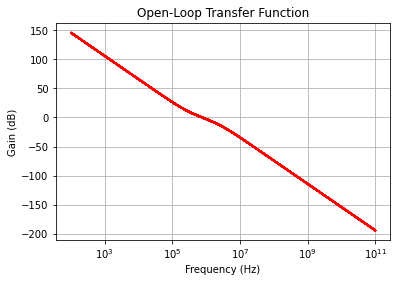

In [9]:
## Open-Loop Transfer Function
OL_TF()

In [10]:
# CL_TF Functions
def CL_TF ():
    # plot closed loop Transfer function
    plt.semilogx(f,20*np.log10(abs(H)), marker = ".",
                 markersize = 1,
                 color = "Blue")
    # plot with grid
    plt.grid(True)
    plt.xlabel('Frequency (Hz)') 
    plt.ylabel('Gain (dB)')
    # display the title
    plt.title('Closed-Loop Transfer Function')
    # show the plot    
    plt.show()

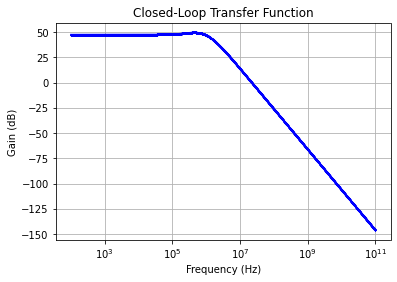

In [11]:
## Closed-Loop Transfer Function
CL_TF()

In [12]:
## REF_Noise Function
def REF_Noise():
    nr      = 10**( -140/10)   # noise floor of reference
    fc_ref  = 10**3 *2* m.pi   # corner frequency number 1
    fc_ref2 = 10**5 *2* m.pi   # corner frequency number 2
    Sref    = 10*np.log10(nr *(1+( fc_ref2 / w)**2+( fc_ref / w)**3))  # reference phase
    # Plot Crystal noise
    plt.semilogx(f,Sref, marker = ".",
                 markersize = 1,
                color = "Cyan")
    # plot with grid
    plt.grid(True)
    plt.xlabel('Frequency (Hz)') 
    plt.ylabel('Phase Noise (dBc/Hz)') 
    # display the title
    plt.title('Crystal Phase Noise Model')
    # show the plot
    plt.show()

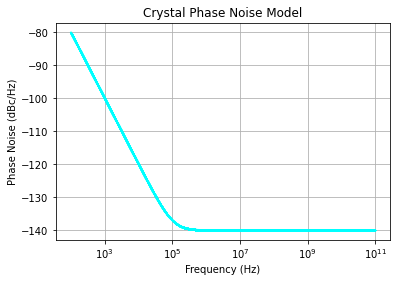

In [13]:
# Crystal Phase Noise Model
REF_Noise()

In [14]:
## N_Divider Function
def N_Divider():
   #SDiv  = nf_div(1 + fc/f**2 ) ##
    nf_d  = 10**( -14)  # noise floor
    fc_d  = 5*10**5* 2* m.pi # corner frequency
    Sndiv = 10*np.log10(nf_d *(1 + fc_d / w))
    # Plot Divider Noise
    plt.semilogx(f,Sndiv, marker = ".",
                 markersize = 1,
                 color = "green")
    # plot with grid
    plt.grid(True)
    plt.xlabel('Frequency (Hz)') 
    plt.ylabel('Phase Noise (dBc/Hz)') 
    # display the title
    plt.title('Int N Divider Phase Noise Model')
    # show the plot
    plt.show() 

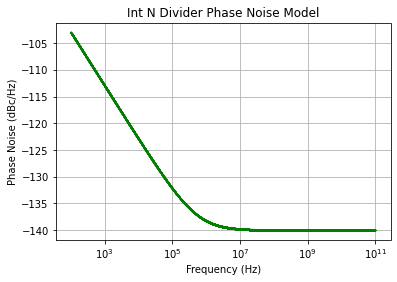

In [15]:
# Int N Divider Phase Noise Model
N_Divider()

In [16]:
## N_VCO Function
def N_VCO():
    ## Svco= n(1/f**2 + fc/f**3 ) ##
    nv = 0.4
    fc_vco = (10**9) *2* m.pi 
    Svco =10*np.log10(nv *(((1) /(w) **2) +( fc_vco /(w) **3) ))
    # Plot VCO Noise
    plt.semilogx(f,Svco, marker = ".",
                 markersize = 1,
                 color = "orange")
    # plot with grid
    plt.grid(True)
    plt.xlabel('Frequency (Hz)') 
    plt.ylabel('Phase Noise (dBc/Hz)') 
    # display the title
    plt.title('VCO Phase Noise Model')
    # show the plot
    plt.show()

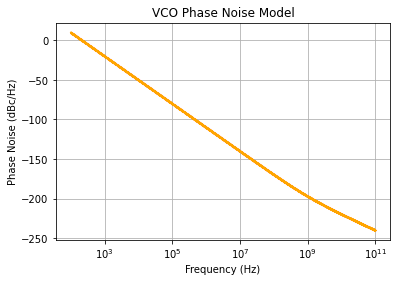

In [17]:
# VCO Phase Noise Model
N_VCO()

In [18]:
## N_PFD_CP Function
def N_PFD_CP():
    nf     = 160*10** -24     # noise floor
    nfd    = 175* 10** -24    # noise floor of down current
    fc_cp  = 1*10**6* 2* m.pi # corner frequency
    alpha1 = 0.005            # on time factor = reset time "0.5 ns" / reference time "100 ns"
    alpha2 = 0.2              # on time factor of down current
    ich1   = alpha1 * nf *(1 + alpha1 * fc_cp / w) + alpha2 * nfd *(1 + alpha2 * fc_cp / w)
    # offset current phase noise
    nf2    = 9*10** -24 # noise floor of the offset current
    ich2   = nf2 *(1 + fc_cp /w)
    Sich   =10*np.log10(ich1 + ich2)  # total current
    # Plot CHP/PFD Noise 
    plt.semilogx(f,Sich, marker = ".",
                 markersize = 1,
                 color = "purple")
    # plot with grid
    plt.grid(True)
    plt.xlabel('Frequency (Hz)') 
    plt.ylabel('Phase Noise (dBc/Hz)') 
    # display the title
    plt.title('PFD/CHP Noise Model')
    # show the plot
    plt.show()

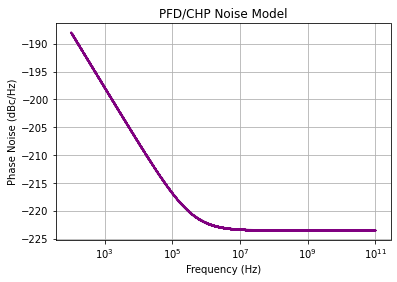

In [19]:
# PFD/CHP Noise Model
N_PFD_CP()

In [20]:
## Note: Still no modeling for DSM quantization noise, and Loop filter noise.
def TOTAL_N():
    ## ---Total output phase noise--- ##
    PN_out_ref     = Sref  + 20*np.log10(abs(H))
    PN_out_div     = Sndiv + 20*np.log10(abs(H))
    PN_out_pfd     = Sich  + 20*np.log10(abs(H/Kpd))
    #PN_out_filter = filter_n + 20*log10(abs(Gvco./(1+OL)))
    PN_out_vco     = Svco  + 20*np.log10(abs(1/(1+OL)))
    PN_out         = 10*np.log10(10.**(PN_out_ref/10) + 10.**(PN_out_div/10) + 10.**(PN_out_pfd/10) + 10.**(PN_out_vco/10))
    # Plot total noise
    plt.semilogx(f, f,PN_out, marker = ".",
                 markersize = 5,
                 color = "Blue")
    # plot with grid
    plt.grid(True)
    plt.xlabel('Frequency (Hz)') 
    plt.ylabel('Phase Noise (dBc/Hz)') 
    # display the title
    plt.title('Output Phase Noise')
    #plt.axis([min(f),max(f),min(PN_out),max(PN_out)])
    # show the plot
    plt.show()    
    # plt.axis 'auto y'
    ##+10.**(PN_out_filter/10) f,PN_out_filter ,'PN out filter'  Filter noise that must be added to the total Noise.

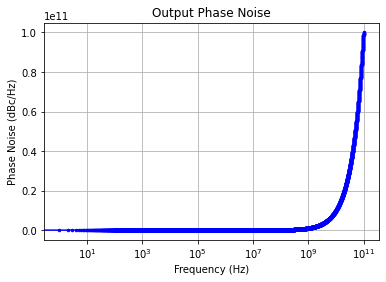

In [21]:
# Output Phase Noise
TOTAL_N()